In [6]:
import pandas as pd
import numpy as np
import openpyxl
import ast
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import folium

In [12]:
# Load the dataset
file_path = 'detecciones_26_11.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, sheet_name=0)

# Function to count tags in a JSON-like column
def count_tags(json_data):
    try:
        json_data = ast.literal_eval(json_data)
        if isinstance(json_data, dict):
            json_data = [json_data]
        return len(json_data)
    except (ValueError, SyntaxError, TypeError):
        return 0

# Apply the function to each angle column and calculate the total tags
for angle in ['Angle_0', 'Angle_90', 'Angle_180', 'Angle_270']:
    data[angle + '_count'] = data[angle].apply(count_tags)
data['total_tags'] = data[['Angle_0_count', 'Angle_90_count', 'Angle_180_count', 'Angle_270_count']].sum(axis=1)

In [13]:
data.head()

,numero_img,index,id,country,country_code,city,node_type,latitude,longitude,indice,category,Angle_0,Angle_90,Angle_180,Angle_270,Angle_0_count,Angle_90_count,Angle_180_count,Angle_270_count,total_tags
0,14,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.962587,-60.685128,ARG_rosario_S_14,autonomy,NaN,{'class_name': 'Stone bollard'},NaN,NaN,0,1,0,0,1
1,16,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963232,-60.688076,ARG_rosario_S_16,autonomy,{'class_name': 'Bench'},NaN,NaN,NaN,1,0,0,0,1
2,17,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963752,-60.685288,ARG_rosario_S_17,autonomy,NaN,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",0,0,0,3,3
3,25,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.961432,-60.684719,ARG_rosario_S_25,autonomy,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",{'class_name': 'Concrete planter'},0,0,2,1,3
4,112,2,ARGS2003IXO2,argentina,ARG,rosario,secundaria,-32.957543,-60.683746,ARG_rosario_S_112,autonomy,NaN,{'class_name': 'Sun umbrella'},NaN,NaN,0,1,0,0,1


In [36]:
# Filter the data for specific cities
cities_to_include = ['medellin', 'cuenca', 'rosario']
data2 = data[data['city'].isin(cities_to_include)]
data2.head()

,numero_img,index,id,country,country_code,city,node_type,latitude,longitude,indice,category,Angle_0,Angle_90,Angle_180,Angle_270,Angle_0_count,Angle_90_count,Angle_180_count,Angle_270_count,total_tags
0,14,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.962587,-60.685128,ARG_rosario_S_14,autonomy,NaN,{'class_name': 'Stone bollard'},NaN,NaN,0,1,0,0,1
1,16,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963232,-60.688076,ARG_rosario_S_16,autonomy,{'class_name': 'Bench'},NaN,NaN,NaN,1,0,0,0,1
2,17,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963752,-60.685288,ARG_rosario_S_17,autonomy,NaN,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",0,0,0,3,3
3,25,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.961432,-60.684719,ARG_rosario_S_25,autonomy,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",{'class_name': 'Concrete planter'},0,0,2,1,3
4,112,2,ARGS2003IXO2,argentina,ARG,rosario,secundaria,-32.957543,-60.683746,ARG_rosario_S_112,autonomy,NaN,{'class_name': 'Sun umbrella'},NaN,NaN,0,1,0,0,1


In [37]:
# Define the conditions for the neighborhoods
conditions = [
    (data2['country'] == 'argentina') & (data2['latitude'] >= -32.97) & (data2['latitude'] <= -32.94),
    (data2['country'] == 'argentina')
]

# Define the corresponding neighborhood names
neighborhoods = ['Villa Banana', 'Nuevo Alberdi']

# Create the new column using np.select
data2['neighborhoods'] = np.select(conditions, neighborhoods, default=None)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32672\1552930527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['neighborhoods'] = np.select(conditions, neighborhoods, default=None)


In [38]:
# Define the conditions for the neighborhoods
conditions += [
    (data2['city'] == 'medellin') & (data2['latitude'] > 6.27) & (data2['latitude'] < 6.28),
    (data2['city'] == 'medellin')
]

# Define the corresponding neighborhood names
neighborhoods += ['Moravia', 'Otros']

# Create the new column using np.select
data2['neighborhoods'] = np.select(conditions, neighborhoods, default=None)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32672\1044433614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['neighborhoods'] = np.select(conditions, neighborhoods, default=None)


In [39]:
# Filter the data for specific neighborhoods and city
neighborhoods_to_include = ['Moravia', 'Villa Banana']
data3 = data2[(data2['neighborhoods'].isin(neighborhoods_to_include)) | (data2['city'] == 'cuenca')]
data3.loc[(data3['city'] == 'cuenca') & (data3['neighborhoods'].isna()), 'neighborhoods'] = 'Santa Maria'
data3.head()

,numero_img,index,id,country,country_code,city,node_type,latitude,longitude,indice,...,Angle_0,Angle_90,Angle_180,Angle_270,Angle_0_count,Angle_90_count,Angle_180_count,Angle_270_count,total_tags,neighborhoods
0,14,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.962587,-60.685128,ARG_rosario_S_14,...,NaN,{'class_name': 'Stone bollard'},NaN,NaN,0,1,0,0,1,Villa Banana
1,16,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963232,-60.688076,ARG_rosario_S_16,...,{'class_name': 'Bench'},NaN,NaN,NaN,1,0,0,0,1,Villa Banana
2,17,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.963752,-60.685288,ARG_rosario_S_17,...,NaN,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",0,0,0,3,3,Villa Banana
3,25,1,ARGS20031,argentina,ARG,rosario,secundaria,-32.961432,-60.684719,ARG_rosario_S_25,...,NaN,NaN,"{'class_name': 'Outdoor bench'}, {'class_name'...",{'class_name': 'Concrete planter'},0,0,2,1,3,Villa Banana
4,112,2,ARGS2003IXO2,argentina,ARG,rosario,secundaria,-32.957543,-60.683746,ARG_rosario_S_112,...,NaN,{'class_name': 'Sun umbrella'},NaN,NaN,0,1,0,0,1,Villa Banana


In [31]:
data3['neighborhoods'].unique()

array(['Villa Banana', 'Moravia', 'Santa Maria'], dtype=object)

In [32]:
# Filter the data for Argentina and the desired category
category = 'safety'  # Replace with the desired category
argentina_data = data3[(data3['neighborhoods'] == 'Villa Banana') & (data3['category'] == category)]

# Create a map centered around the average latitude and longitude of the points
map_center = [argentina_data['latitude'].mean(), argentina_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in argentina_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}\nCategory: {row['category']}\nTotal Tags: {row['total_tags']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m

In [40]:
category = 'safety'  # Replace with the desired category
colombia_data = data3[(data3['neighborhoods'] == 'Moravia') & (data3['category'] == category)]

# Create a map centered around the average latitude and longitude of the points
map_center = [colombia_data['latitude'].mean(), colombia_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in colombia_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}\nCategory: {row['category']}\nTotal Tags: {row['total_tags']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m

In [41]:
category = 'safety'  # Replace with the desired category
ecuador_data = data3[(data3['neighborhoods'] == 'Santa Maria') & (data3['category'] == category)]

# Create a map centered around the average latitude and longitude of the points
map_center = [ecuador_data['latitude'].mean(), ecuador_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in ecuador_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}\nCategory: {row['category']}\nTotal Tags: {row['total_tags']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m

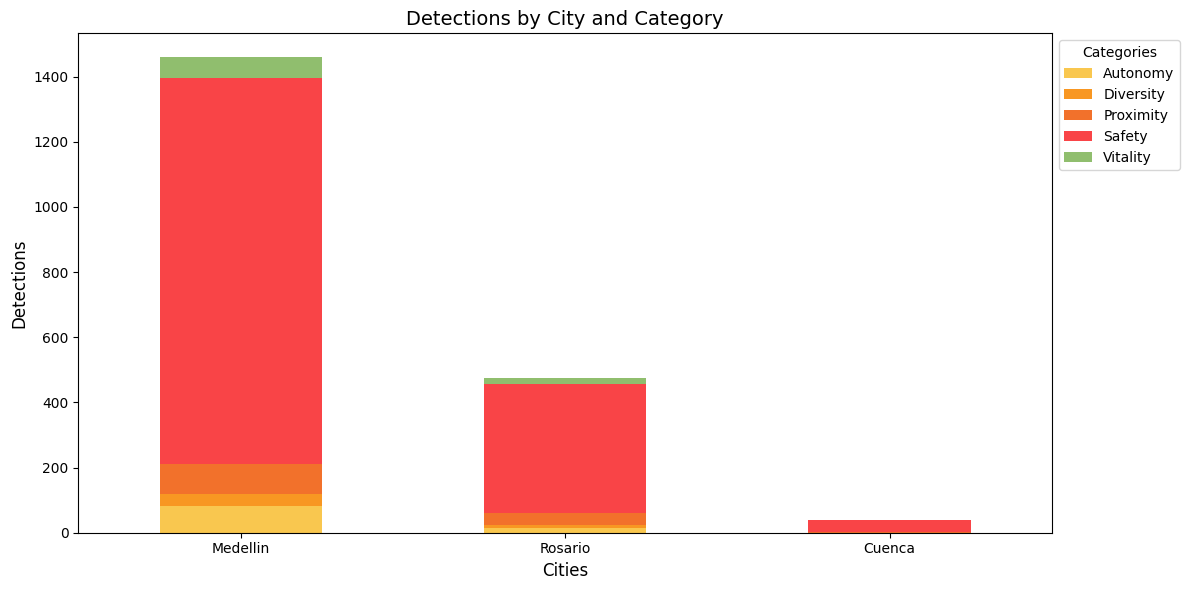

In [44]:
# Group data by city and category
category_city_counts = data3.groupby(['city', 'category'])['total_tags'].sum().unstack(fill_value=0)

# Capitalize city names and category names
category_city_counts.index = category_city_counts.index.str.capitalize()
category_city_counts.columns = [col.capitalize() for col in category_city_counts.columns]

# Define the corrected color mapping for categories
image_color_map = {
    'Representativity': '#43AA8B',
    'Diversity': '#F89722',
    'Vitality': '#90BE6E',
    'Autonomy': '#F9C74F',
    'Proximity': '#F2712B',
    'Safety': '#F94447',
}

# Calculate the total number of objects per city
city_totals = category_city_counts.sum(axis=1).sort_values(ascending=False)

# Reorder the category_city_counts DataFrame based on city_totals
category_city_counts = category_city_counts.loc[city_totals.index]

# Plot the city-wise stacked bar chart
colors = [image_color_map[cat] for cat in category_city_counts.columns]
category_city_counts.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=colors
)
plt.title('Detections by City and Category', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Detections', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Categories', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

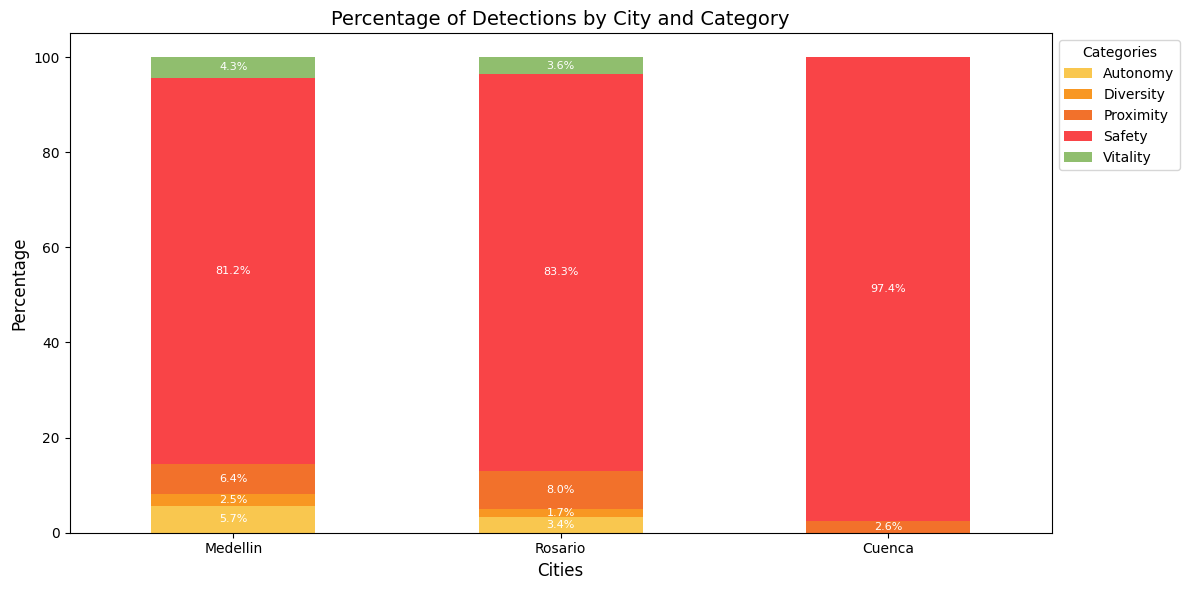

In [46]:
# Calculate the percentage of each category within each city
category_city_percentages = category_city_counts.div(category_city_counts.sum(axis=1), axis=0) * 100

# Plot the city-wise stacked bar chart with percentages
colors = [image_color_map[cat] for cat in category_city_counts.columns]
ax = category_city_percentages.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=colors
)
plt.title('Percentage of Detections by City and Category', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

# Add percentage values inside the segments if they are greater than 1%
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 1:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()

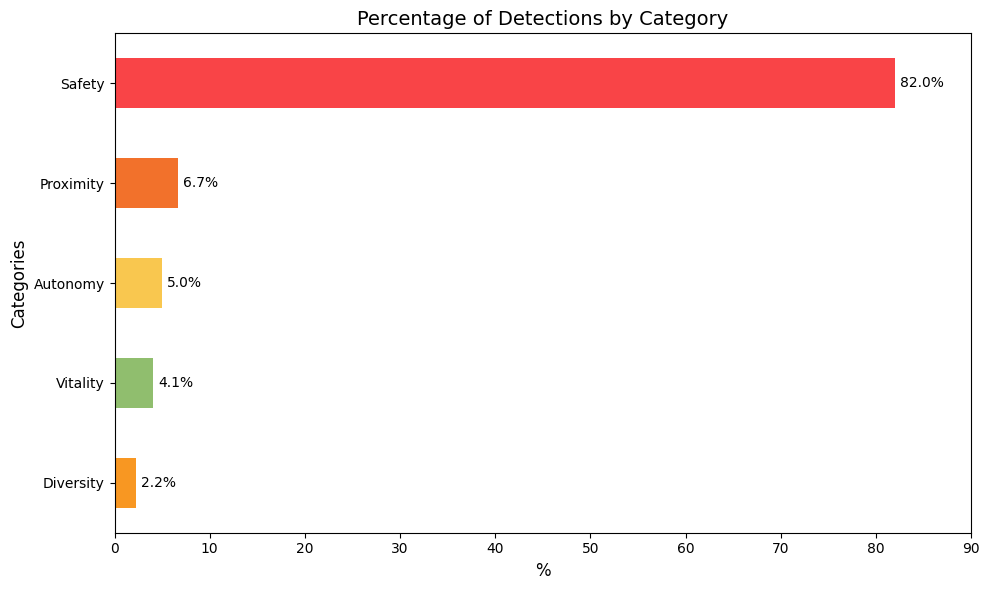

In [50]:
# Calculate the total number of objects per category
total_per_category = category_city_counts.sum(axis=0)

# Calculate the percentage of each category
total_detections = total_per_category.sum()
percentage_per_category = (total_per_category / total_detections) * 100

# Plot the category-wise horizontal bar chart in descending order
plt.figure(figsize=(10, 6))
ax = percentage_per_category.sort_values(ascending=False).plot(
    kind='barh', color=[image_color_map[cat] for cat in percentage_per_category.sort_values(ascending=False).index]
)
plt.title('Percentage of Detections by Category', fontsize=14)
plt.xlabel('%', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.xlim(0, 90)  # Set the x-axis limit to 60%
plt.gca().invert_yaxis()  # To place the highest percentage at the top

# Add percentage values at the end of the bars
for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2,
             f'{i.get_width():.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()


# Save the processed dataset with total tags
data.to_csv('processed_dataset.csv', index=False)

In [51]:
# Generate text summaries for detections by city and category
city_summary = []
for city in category_city_counts.index:
    city_summary.append(f"City: {city}")
    city_total = city_totals[city]
    for category in category_city_counts.columns:
        category_total = category_city_counts.loc[city, category]
        percentage = (category_total / city_total) * 100
        city_summary.append(f"  {category}: {category_total} detections ({percentage:.2f}%)")
    city_summary.append("")

category_summary = []
total_detections = total_per_category.sum()
for category in total_per_category.index:
    category_total = total_per_category[category]
    percentage = (category_total / total_detections) * 100
    category_summary.append(f"{category}: {category_total} detections ({percentage:.2f}%)")

# Print summaries
print("\nCity-Wise Summary:\n")
print("\n".join(city_summary))

print("\nCategory-Wise Summary:\n")
print("\n".join(category_summary))


City-Wise Summary:

City: Medellin
  Autonomy: 83 detections (5.68%)
  Diversity: 36 detections (2.47%)
  Proximity: 93 detections (6.37%)
  Safety: 1185 detections (81.16%)
  Vitality: 63 detections (4.32%)

City: Rosario
  Autonomy: 16 detections (3.38%)
  Diversity: 8 detections (1.69%)
  Proximity: 38 detections (8.02%)
  Safety: 395 detections (83.33%)
  Vitality: 17 detections (3.59%)

City: Cuenca
  Autonomy: 0 detections (0.00%)
  Diversity: 0 detections (0.00%)
  Proximity: 1 detections (2.56%)
  Safety: 38 detections (97.44%)
  Vitality: 0 detections (0.00%)


Category-Wise Summary:

Autonomy: 99 detections (5.02%)
Diversity: 44 detections (2.23%)
Proximity: 132 detections (6.69%)
Safety: 1618 detections (82.01%)
Vitality: 80 detections (4.05%)


In [52]:
# Create a summary table by city and category
summary_table = category_city_counts.copy()

# Add percentage columns
for category in category_city_counts.columns:
    summary_table[category + '_percentage'] = category_city_percentages[category]

# Reset index to have city as a column
summary_table = summary_table.reset_index()

# Merge with the original data to get the country information
city_country_mapping = data[['city', 'country_code']].drop_duplicates().set_index('city')
city_country_mapping.index = city_country_mapping.index.str.capitalize()
summary_table = summary_table.merge(city_country_mapping, left_on='city', right_index=True, how='left')

# Reorder columns to have country as the first column
summary_table = summary_table[['country_code', 'city'] + list(category_city_counts.columns) + [col + '_percentage' for col in category_city_counts.columns]]

# Melt the DataFrame to have a long format
summary_table = summary_table.melt(id_vars=['country_code', 'city'], value_vars=category_city_counts.columns, var_name='Category', value_name='Detections')
summary_table['Percentage'] = summary_table.apply(lambda row: category_city_percentages.loc[row['city'], row['Category']], axis=1)

# Sort the table by country, city, category ascending and detections descending
summary_table = summary_table.sort_values(by=['country_code', 'city', 'Category', 'Detections'], ascending=[True, True, True, False])
summary_table

,country_code,city,Category,Detections,Percentage
1,ARG,Rosario,Autonomy,16,3.375527
4,ARG,Rosario,Diversity,8,1.687764
7,ARG,Rosario,Proximity,38,8.016878
10,ARG,Rosario,Safety,395,83.333333
13,ARG,Rosario,Vitality,17,3.586498
0,COL,Medellin,Autonomy,83,5.684932
3,COL,Medellin,Diversity,36,2.465753
6,COL,Medellin,Proximity,93,6.369863
9,COL,Medellin,Safety,1185,81.164384
12,COL,Medellin,Vitality,63,4.315068
